# Weather Analysis

1. As the Latitude increases, the temperature increases
2. Windspeed and humidity is not dependent on longitude latitude specifically.
    It is more dependent on seasons rather than latitude
3. There are fewers cities in (-longitute, -latitude) area of the planet

In [30]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import csv
import pandas as pd
import random
import seaborn as sns
from pprint import pprint
from myKeys import WEATHER_KEY
from citipy import citipy

In [33]:
#can also use numpy function mp.linspace
#mp.linspace(-90,90,10)
#mp.linspace(-180,180,10)
#you get two list of numbers which you pair up to create coordinates
x_coord = []
y_coord = []
for count in range(400):
    x_coord.append(random.randrange(0,180))
    x_coord.append(random.randrange(0,180))
    x_coord.append(random.randrange(0,180)*(-1))
    x_coord.append(random.randrange(0,180)*(-1))

for count in range(400):
    y_coord.append(random.randrange(0,90))
    y_coord.append(random.randrange(0,90))
    y_coord.append(random.randrange(0,90)*(-1))
    y_coord.append(random.randrange(0,90)*(-1))

cities_df = pd.DataFrame({
    'x' : x_coord,
    'y' : y_coord
})
print(len(cities_df))
print(cities_df.head())

1600
     x   y
0   16  12
1  109  84
2  -66  -4
3  -85   0
4   17  27


In [34]:
#get list of cities
cities = []
countries = []
for index, row in cities_df.iterrows():
    lon = float(row["x"])
    lat = float(row["y"])
    city = citipy.nearest_city(lat, lon)
    cities.append(city.city_name)
    countries.append(city.country_code.upper())
    
cities_df['city'] = cities
cities_df['country'] = countries

cities_df = cities_df.drop_duplicates('city')

print(len(cities_df))
print(cities_df.head())


575
     x   y       city country
0   16  12   dourbali      TD
1  109  84  saskylakh      RU
2  -66  -4   carauari      BR
3  -85   0      manta      EC
4   17  27     waddan      LY


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': WEATHER_KEY,
    'units': 'metric',
    'q': 'khatanga'
}
api_call = requests.get(url, params=query_params)
print(api_call.url)
print('hello')
response = api_call.json()
pprint(response)


print(response['coord']['lat'])
print(response['main']['temp'])
print(response['clouds']['all'])
print(response['main']['humidity'])
print(response['wind']['speed'])
print(response['coord']['lat'])

http://api.openweathermap.org/data/2.5/weather?appid=f810ff617c37da540f9e096683959869&units=metric&q=khatanga
hello
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 71.98, 'lon': 102.47},
 'dt': 1529023067,
 'id': 2022572,
 'main': {'grnd_level': 1020.88,
          'humidity': 52,
          'pressure': 1020.88,
          'sea_level': 1025.35,
          'temp': 23.62,
          'temp_max': 23.62,
          'temp_min': 23.62},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'message': 0.0033, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 215, 'speed': 3.16}}
71.98
23.62
0
52
3.16
71.98


In [36]:
with open('log.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City Number', 'City Name', 'Requested URL'])
    
    # Build URL
    url = "http://api.openweathermap.org/data/2.5/weather"
    query_params = {
        'appid': WEATHER_KEY,
        'units': 'metric'
    }

    cities = cities_df['city']

    # set up lists to hold reponse info
    lat = []
    temp = []
    cloud = []
    humidity = []
    wind_speed = []
    error = []
    count = 0
    # Loop through the list of cities and perform a request for data on each
    for city in cities:
        try:
            query_params['q'] = city
            api_call = requests.get(url, params=query_params)
            response = api_call.json()
            #lat.append(response)
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            cloud.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            wind_speed.append(response['wind']['speed'])
        except KeyError:
            lat.append('Error')
            temp.append('Error')
            cloud.append('Error')
            humidity.append('Error')
            wind_speed.append('Error')
            error.append(city)

        csvwriter.writerow([count, city])
        count = count + 1
        
cities_df['lat'] = lat
cities_df['temp'] = temp
cities_df['cloud'] = cloud
cities_df['humidity'] = humidity
cities_df['wind_speed'] = wind_speed 
print(cities_df.head())


     x   y       city country    lat   temp cloud humidity wind_speed
0   16  12   dourbali      TD  11.81  25.92    32       73       2.31
1  109  84  saskylakh      RU  71.97  16.27    80       62       4.96
2  -66  -4   carauari      BR  -4.88  25.42    24       90       0.86
3  -85   0      manta      EC   45.1  16.42    12       94       1.41
4   17  27     waddan      LY  29.16  23.92    44       52       6.01


In [37]:
#list of cities not found by API
print(error)

['andenes', 'korla', 'tumannyy', 'belushya guba', 'gazni', 'vaitupu', 'sentyabrskiy', 'meyungs', 'talawdi', 'ondorhaan', 'nizhneyansk', 'kemijarvi', 'beruni', 'kamenskoye', 'primore', 'paradwip', 'marcona', 'barentsburg', 'acara', 'bossembele', 'samusu', 'karaul', 'lalomanu', 'kazalinsk', 'muika', 'yuzhno-yeniseyskiy', 'malwan', 'saleaula', 'khonuu', 'hihifo', 'halalo', 'haibowan', 'yambio', 'falealupo', 'tabukiniberu', 'cheuskiny', 'maarianhamina', 'amderma', 'vitoria da conquista', 'erdemli', 'viligili', 'karamay', 'ust-kamchatsk', 'jinchengjiang', 'singkawang', 'kapoeta', 'gorno-chuyskiy', 'krasnoselkup', 'inderborskiy', 'borama', 'kollumerland', 'aban', 'qandahar', 'sahrak', 'mirina', 'lhuntshi', 'jiddah', 'tuggurt', 'asayita', 'pousat', 'meilu', 'camana', 'waling', 'phan rang', 'azad shahr', 'eldikan', 'bac lieu', 'tubruq', 'warqla', 'yei', 'gilazi']


In [38]:
#clean data by removing all 'Error'
#or just set any error as NaN in the DF and then run np.dropna from the numpy pkg.
cities_df = cities_df[cities_df['temp'] != 'Error']
print(len(cities_df))
print(cities_df.head())

504
     x   y       city country    lat   temp cloud humidity wind_speed
0   16  12   dourbali      TD  11.81  25.92    32       73       2.31
1  109  84  saskylakh      RU  71.97  16.27    80       62       4.96
2  -66  -4   carauari      BR  -4.88  25.42    24       90       0.86
3  -85   0      manta      EC   45.1  16.42    12       94       1.41
4   17  27     waddan      LY  29.16  23.92    44       52       6.01


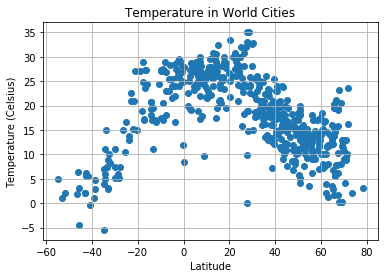

In [39]:
plt.scatter(cities_df["lat"], cities_df["temp"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

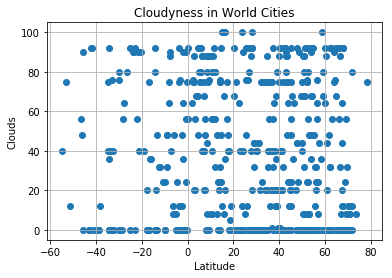

In [40]:
plt.scatter(cities_df["lat"], cities_df["cloud"], marker="o")

plt.title("Cloudyness in World Cities")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloundsInWorldCities.png")

plt.show()

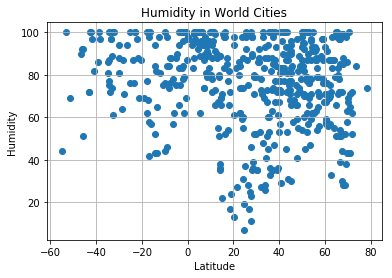

In [41]:
plt.scatter(cities_df["lat"], cities_df["humidity"], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

plt.show()

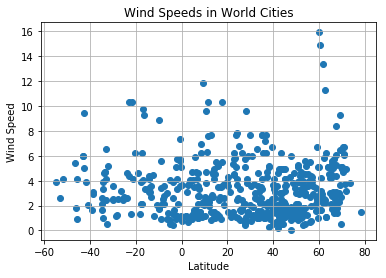

In [42]:
plt.scatter(cities_df["lat"], cities_df["wind_speed"], marker="o")

plt.title("Wind Speeds in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

plt.show()